In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import mode 
from sklearn.preprocessing import LabelEncoder
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score

c:\users\vipul\appdata\local\programs\python\python38\lib\site-packages\scipy\__init__.py:173: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.19.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
test_data = pd.read_csv("C:/Users/vipul/Downloads/test_employee_attrition.csv")
train_data = pd.read_csv("C:/Users/vipul/Downloads/train_employee_attrition.csv")

In [3]:
train_data.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [4]:
train_data.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,...,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,36.036971,892.749553,8.683959,2.937984,1.0,2.757901,67.798450,2.782349,1.998807,...,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,484.252517,8.507112,374.496259,7.826143,1.039078,0.0,1.086835,19.435928,0.650664,1.083065,...,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,0.000000,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,51.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,838.000000,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,69.000000,3.000000,2.000000,...,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1257.000000,41.000000,1223.000000,12.000000,4.000000,1.0,4.000000,84.000000,3.000000,2.000000,...,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1676.000000,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,...,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [6]:
print(train_data.isnull().sum())

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [7]:
train_data.shape

(1677, 35)

In [8]:
cat_col = []
for x in train_data.dtypes.index:
    if train_data.dtypes[x] == 'object':
        cat_col.append(x)
        
cat_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [9]:
for col in cat_col:
    print(col)
    print(train_data[col].value_counts())
    print()

BusinessTravel
Travel_Rarely        1290
Travel_Frequently     261
Non-Travel            126
Name: BusinessTravel, dtype: int64

Department
Research & Development    1167
Sales                      471
Human Resources             39
Name: Department, dtype: int64

EducationField
Life Sciences       775
Medical             549
Marketing           152
Technical Degree    106
Other                82
Human Resources      13
Name: EducationField, dtype: int64

Gender
Male      1064
Female     613
Name: Gender, dtype: int64

JobRole
Sales Executive              355
Research Scientist           344
Laboratory Technician        334
Manufacturing Director       196
Healthcare Representative    155
Manager                      111
Sales Representative          77
Research Director             71
Human Resources               34
Name: JobRole, dtype: int64

MaritalStatus
Married     773
Single      577
Divorced    327
Name: MaritalStatus, dtype: int64

Over18
Y    1677
Name: Over18, dtype: int64


<AxesSubplot: >

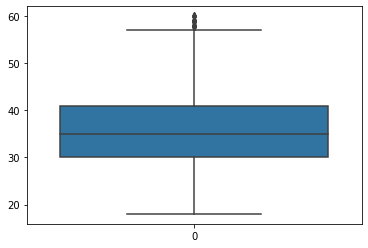

In [10]:
sns.boxplot(train_data['Age'])

<AxesSubplot: title={'center': 'JobRole and Attrition'}>

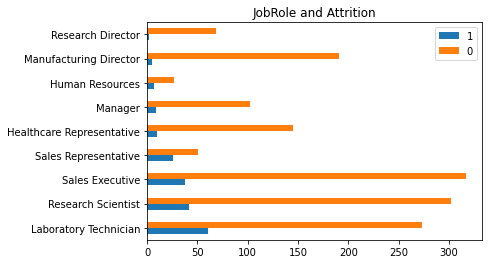

In [11]:
n_train_data = pd.DataFrame()

n_train_data[1] = train_data[train_data['Attrition'] == 1]['JobRole'].value_counts()
n_train_data[0] = train_data[train_data['Attrition'] == 0]['JobRole'].value_counts()

n_train_data.plot.barh(title = 'JobRole and Attrition')

<AxesSubplot: title={'center': 'EducationField and Attrition'}>

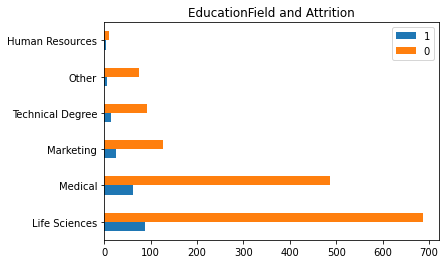

In [12]:
n_train_data = pd.DataFrame()

n_train_data[1] = train_data[train_data['Attrition'] == 1]['EducationField'].value_counts()
n_train_data[0] = train_data[train_data['Attrition'] == 0]['EducationField'].value_counts()

n_train_data.plot.barh(title = 'EducationField and Attrition')

<AxesSubplot: title={'center': 'Gender and Attrition'}>

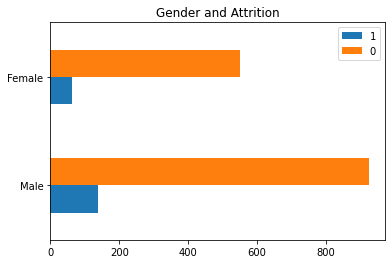

In [13]:
n_train_data = pd.DataFrame()

n_train_data[1] = train_data[train_data['Attrition'] == 1]['Gender'].value_counts()
n_train_data[0] = train_data[train_data['Attrition'] == 0]['Gender'].value_counts()

n_train_data.plot.barh(title = 'Gender and Attrition')

## Relationship between categorical data and attrition

In [21]:
data_size = train_data.pivot_table(index="EnvironmentSatisfaction", columns="Attrition", aggfunc="size")
data_size

Attrition,0,1
EnvironmentSatisfaction,,
1,244,55
2,305,40
3,438,58
4,490,47


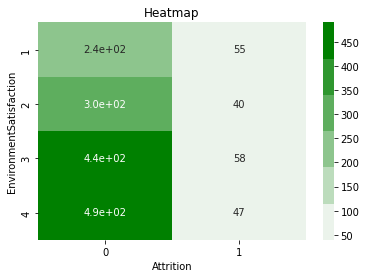

In [22]:
sns.heatmap(data_size, cmap=sns.light_palette("green"),annot=True)
plt.title("Heatmap")
plt.show()

In [23]:
job_size = train_data.pivot_table(index="JobSatisfaction", columns="Attrition", aggfunc="size")
job_size

Attrition,0,1
JobSatisfaction,,
1,263,47
2,256,34
3,447,69
4,511,50


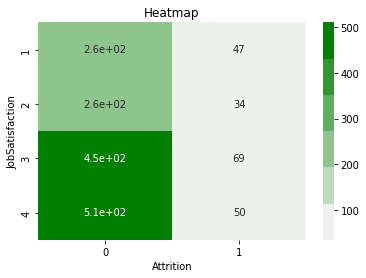

In [24]:
sns.heatmap(job_size, cmap=sns.light_palette("green"),annot=True)
plt.title("Heatmap")
plt.show()

In [25]:
wlb_size = train_data.pivot_table(index="WorkLifeBalance", columns="Attrition", aggfunc="size")
wlb_size

Attrition,0,1
WorkLifeBalance,,
1,50,18
2,343,42
3,965,124
4,119,16


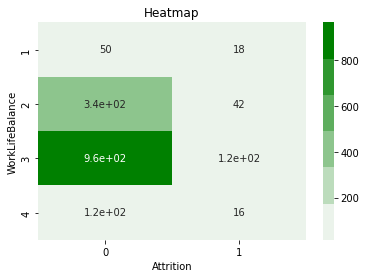

In [26]:
sns.heatmap(wlb_size, cmap=sns.light_palette("green"),annot=True)
plt.title("Heatmap")
plt.show()

## data Preprosessing
  

In [29]:
from sklearn.preprocessing import LabelEncoder

for column in train_data.columns:
    fields = []
    if train_data[column].dtype == 'object':
        encoder = LabelEncoder()
        train_data[column] = encoder.fit_transform(train_data[column].values)

In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   id                        1677 non-null   int64
 1   Age                       1677 non-null   int64
 2   BusinessTravel            1677 non-null   int32
 3   DailyRate                 1677 non-null   int64
 4   Department                1677 non-null   int32
 5   DistanceFromHome          1677 non-null   int64
 6   Education                 1677 non-null   int64
 7   EducationField            1677 non-null   int32
 8   EmployeeCount             1677 non-null   int64
 9   EnvironmentSatisfaction   1677 non-null   int64
 10  Gender                    1677 non-null   int32
 11  HourlyRate                1677 non-null   int64
 12  JobInvolvement            1677 non-null   int64
 13  JobLevel                  1677 non-null   int64
 14  JobRole                   1677 non-null 

In [31]:
train_data_corr = train_data.corr(method='pearson')
train_data_corr


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
id,1.000000,0.027563,-0.031831,0.003572,0.014652,0.007871,-0.015997,-0.007152,NaN,0.044271,...,NaN,-0.041337,-0.004288,0.010423,-0.006236,-0.020820,-0.020064,-0.002203,-0.005955,-0.006598
Age,0.027563,1.000000,0.017462,0.039686,-0.014663,-0.049025,0.223545,-0.018181,NaN,0.029557,...,NaN,0.064863,0.648047,0.014303,0.034138,0.306628,0.219880,0.204357,0.201601,-0.161044
BusinessTravel,-0.031831,0.017462,1.000000,-0.015708,-0.020004,0.005933,-0.018889,0.004240,NaN,-0.002002,...,NaN,-0.047337,0.008332,0.031099,-0.012355,-0.040091,-0.079881,-0.021144,-0.064886,0.000552
DailyRate,0.003572,0.039686,-0.015708,1.000000,0.025107,0.024168,-0.007035,-0.021046,NaN,0.006483,...,NaN,0.021273,0.058044,-0.023140,0.025152,0.066057,0.057011,0.037035,0.040969,-0.022380
Department,0.014652,-0.014663,-0.020004,0.025107,1.000000,0.029781,0.013881,-0.065715,NaN,-0.000465,...,NaN,-0.005868,0.021490,0.046363,-0.012399,0.022345,0.029925,0.053127,0.041859,0.031996
DistanceFromHome,0.007871,-0.049025,0.005933,0.024168,0.029781,1.000000,-0.011436,-0.023405,NaN,0.004959,...,NaN,0.039086,-0.033573,-0.000239,-0.017184,-0.023564,-0.006670,-0.004215,0.013749,0.024741
Education,-0.015997,0.223545,-0.018889,-0.007035,0.013881,-0.011436,1.000000,-0.019603,NaN,-0.011189,...,NaN,0.041722,0.153291,-0.011924,-0.009697,0.116723,0.094065,0.050483,0.109573,-0.084305
EducationField,-0.007152,-0.018181,0.004240,-0.021046,-0.065715,-0.023405,-0.019603,1.000000,NaN,0.028366,...,NaN,-0.016655,-0.008423,0.070101,0.008050,0.012349,0.025646,-0.001262,-0.000790,-0.006513
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,0.044271,0.029557,-0.002002,0.006483,-0.000465,0.004959,-0.011189,0.028366,NaN,1.000000,...,NaN,0.002093,0.022254,-0.028982,0.045387,0.009290,0.016942,0.028711,0.022839,-0.092426


### Clear uncorrelated variables

In [33]:
new_train_data = train_data.copy()
new_train_data = train_data.drop(columns = ['Over18','EmployeeCount','StandardHours'])

In [34]:
from sklearn.model_selection import train_test_split
x_train_data = new_train_data.drop(columns=['Attrition'])
X = x_train_data
y = train_data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42, test_size=0.3)

## Modeling

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
train_scaled= ss.transform(X_train)
test_scaled = ss.transform(X_test)

lr = LogisticRegression(C=0.1, max_iter=1000)
lr.fit(train_scaled, y_train)
lr_pred = lr.predict(test_scaled)

print("Accuracy:", lr.score(test_scaled, y_test)*100)

Accuracy: 87.6984126984127


# Ensemble

Accuracy: 87.6984126984127
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       439
           1       0.80      0.06      0.11        65

    accuracy                           0.88       504
   macro avg       0.84      0.53      0.52       504
weighted avg       0.87      0.88      0.83       504



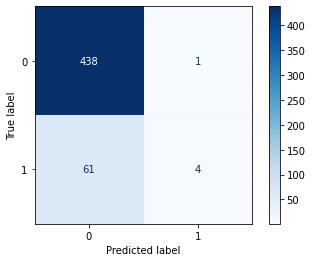

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

rf = RandomForestClassifier(oob_score=True, random_state=42)
rf.fit(X_train, y_train)
random_pred = rf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test,random_pred)*100)
print(metrics.classification_report(y_test, random_pred))
ConfusionMatrixDisplay.from_predictions(y_test, random_pred, cmap = 'Blues')

# KNN

Accuracy: 85.9126984126984
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       439
           1       0.31      0.08      0.12        65

    accuracy                           0.86       504
   macro avg       0.59      0.53      0.52       504
weighted avg       0.80      0.86      0.82       504



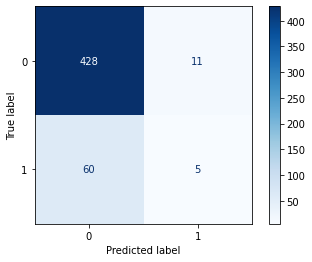

In [40]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, y_train)
knn_pred = kn.predict(test_scaled)

print("Accuracy:", kn.score(test_scaled, y_test)*100)
print(metrics.classification_report(y_test, knn_pred))
ConfusionMatrixDisplay.from_predictions(y_test, knn_pred, cmap = 'Blues')

### Decision Tree with hyper paramenter tunning

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease':np.arange(0.0001,0.001,0.0001),
          'max_depth':range(5,20,1),
          'min_samples_split':range(2,100,10)}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(X_train, y_train)
dt = gs.best_estimator_
print(dt.score(X_train, y_train))

0.9002557544757033


In [43]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),params, n_jobs=-1)
gs.fit(X_train, y_train)
print(gs.best_params_)

{'max_depth': 5, 'min_impurity_decrease': 0.0007000000000000001, 'min_samples_split': 92}


In [44]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8729805419167121


Accuracy: 84.32539682539682
              precision    recall  f1-score   support

           0       0.88      0.96      0.91       439
           1       0.21      0.08      0.11        65

    accuracy                           0.84       504
   macro avg       0.54      0.52      0.51       504
weighted avg       0.79      0.84      0.81       504



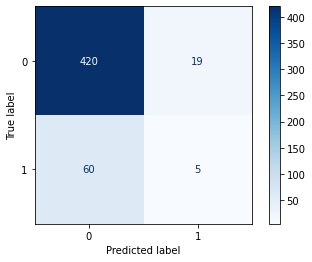

In [45]:
clf = DecisionTreeClassifier(max_depth =5, random_state=42)
clf.fit(train_scaled, y_train)
dtree_pred = clf.predict(test_scaled)
print("Accuracy:", metrics.accuracy_score(y_test, dtree_pred)*100)
print(metrics.classification_report(y_test, dtree_pred))
ConfusionMatrixDisplay.from_predictions(y_test, dtree_pred, cmap = 'Blues')

# XGboost

In [50]:
!pip3 install xgboost

You should consider upgrading via the 'c:\users\vipul\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.



from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test,xgb_pred)*100)
print(metrics.classification_report(y_test, xgb_pred))
ConfusionMatrixDisplay.from_predictions(y_test, xgb_pred, cmap = 'Blues')

# Variable importance

### Random Forest Feature importance

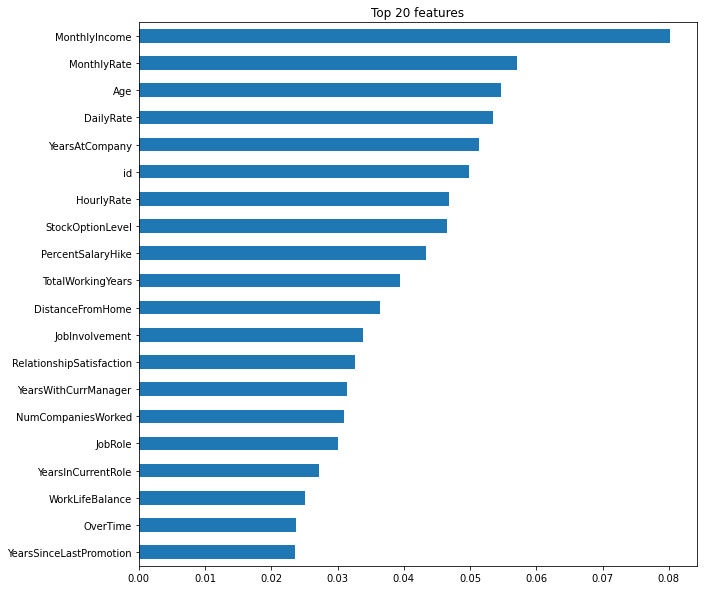

In [54]:
importances = pd.Series(rf.feature_importances_, X_train.columns)

import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [55]:
train_data_new = train_data.copy()

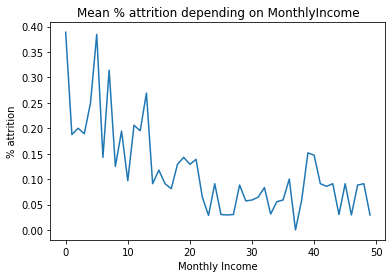

In [56]:
train_data_new['MI_split'] = pd.qcut(train_data_new['MonthlyIncome'], 50, labels=False, duplicates = 'drop')

mean_deposit = train_data_new.groupby(['MI_split'])['Attrition'].mean()

plt.plot(mean_deposit.index, mean_deposit.values)
plt.title('Mean % attrition depending on MonthlyIncome')
plt.xlabel('Monthly Income')
plt.ylabel('% attrition')
plt.show()

In [57]:
train_data_new[train_data_new['MI_split'] == 6]['MonthlyIncome'].min()

2387

## Looking at this graph, people who receive less than 2,387 are likely to change jobs.

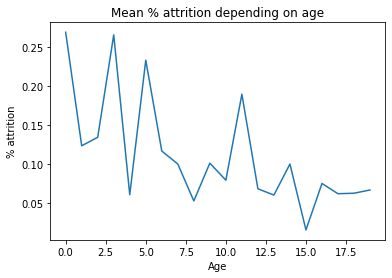

In [59]:
train_data_new['age_split'] = pd.qcut(train_data_new['Age'], 20, labels=False, duplicates = 'drop')

mean_deposit = train_data_new.groupby(['age_split'])['Attrition'].mean()

plt.plot(mean_deposit.index, mean_deposit.values)
plt.title('Mean % attrition depending on age')
plt.xlabel('Age')
plt.ylabel('% attrition')
plt.show()

In [60]:
train_data_new[train_data_new['age_split'] == 5]['Age'].min()

31

In [61]:
train_data_new[train_data_new['age_split'] == 9]['Age'].max()

35

### People over 31 and under 35 change jobs a lot.

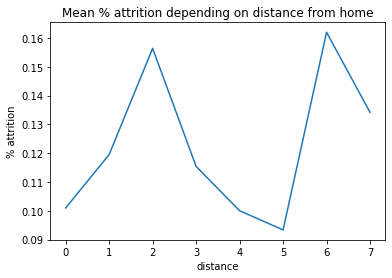

In [63]:
train_data_new['distance_split'] = pd.qcut(train_data_new['DistanceFromHome'], 10, labels=False, duplicates = 'drop')

mean_deposit = train_data_new.groupby(['distance_split'])['Attrition'].mean()

plt.plot(mean_deposit.index, mean_deposit.values)
plt.title('Mean % attrition depending on distance from home')
plt.xlabel('distance')
plt.ylabel('% attrition')
plt.show()

In [64]:
train_data_new[train_data_new['distance_split'] == 5]['DistanceFromHome'].min()

11

### If the distance from home is more than 11, there is a possibility of changing jobs

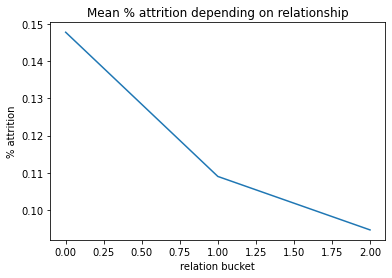

In [66]:
train_data_new['relation_split'] = pd.qcut(train_data_new['RelationshipSatisfaction'], 20, labels=False, duplicates = 'drop')

mean_deposit = train_data_new.groupby(['relation_split'])['Attrition'].mean()

plt.plot(mean_deposit.index, mean_deposit.values)
plt.title('Mean % attrition depending on relationship')
plt.xlabel('relation bucket')
plt.ylabel('% attrition')
plt.show()

In [67]:
train_data_new[train_data_new['relation_split'] ==1]['RelationshipSatisfaction'].min()

3

### If the relationship satisfaction level is less than 3 points, there is a high possibility of changing jobs.